Enter expiration date in YYYY-MM-DD format: 2023-03-31
Enter the stock ticker(s): TSLA
190


<IPython.core.display.Javascript object>


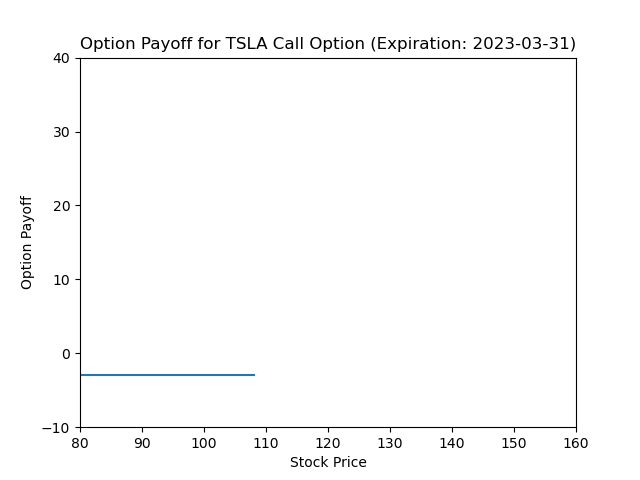

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib nbagg

# User-defined inputs
expiration_date = input("Enter expiration date in YYYY-MM-DD format: ")
stock_ticker = input("Enter the stock ticker(s): ")
current_price = input("")
strike_price = 125
option_premium = 3

# Create a range of stock prices
stock_prices = pd.Series(range(80, 160))

# Define the option payoff function
def option_payoff(stock_price, strike_price, option_premium):
    if stock_price < strike_price:
        return -option_premium
    else:
        return stock_price - strike_price - option_premium

# Apply the option payoff function to the stock price range
option_payoffs = stock_prices.apply(option_payoff, args=(strike_price, option_premium))

# Create a dataframe with the stock prices and option payoffs
df = pd.DataFrame({'Stock Price': stock_prices, 'Option Payoff': option_payoffs})

# Create the figure and axis objects
fig, ax = plt.subplots()

# Set the axis limits
ax.set_xlim([80, 160])
ax.set_ylim([-10, 40])

# Set the axis labels
ax.set_xlabel('Stock Price')
ax.set_ylabel('Option Payoff')

# Set the title
ax.set_title(f'Option Payoff for {stock_ticker} Call Option (Expiration: {expiration_date})')

# Create the line object
line, = ax.plot([], [])

# Define the update function for the animation
def update(frame):
    x = df['Stock Price'][:frame+1]
    y = df['Option Payoff'][:frame+1]
    line.set_data(x, y)
    return line,

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(df), interval=100, blit=True)

# Show the plot
plt.show()
